In [182]:
from HeaderP import *
import seaborn as sns

In [226]:
df = pd.read_pickle('Data/Buck_g2_79e12.pkl')

In [343]:
#plt.figure(figsize=(10,8))
df = df.loc[df['R']>6].reset_index(drop=True)
df = df.loc[df['R']<11].reset_index(drop=True)
df = df.loc[df['x']>0].reset_index(drop=True)
df = df.loc[abs(df['z'])<5].reset_index(drop=True)
"""agebins = np.linspace(0,14,100)
fehnorm = df.feh.values
for i in trange(len(agebins)-1):
    m = (df.age>agebins[i])&(df.age<agebins[i+1])
    fehnorm[m] = fehnorm[m]/np.median(fehnorm[m])
df['fehnorm'] = fehnorm"""
len(df)

530973

Text(0, 0.5, '[O/Fe]')

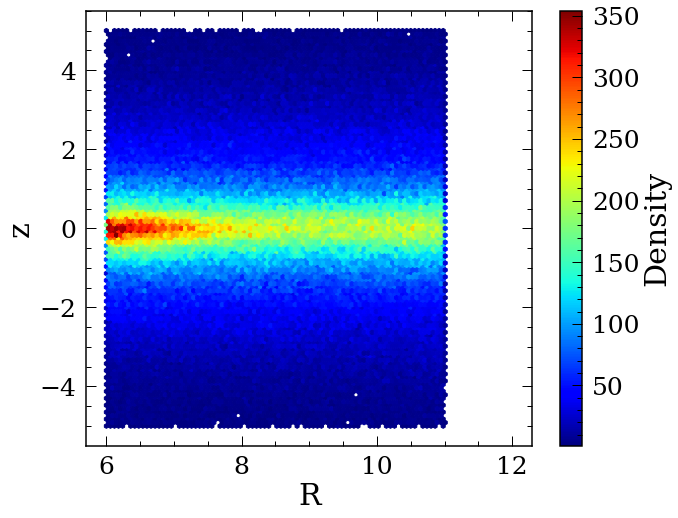

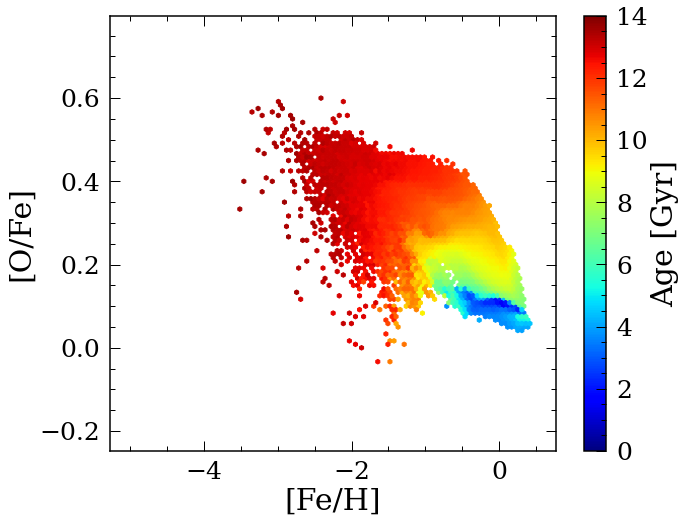

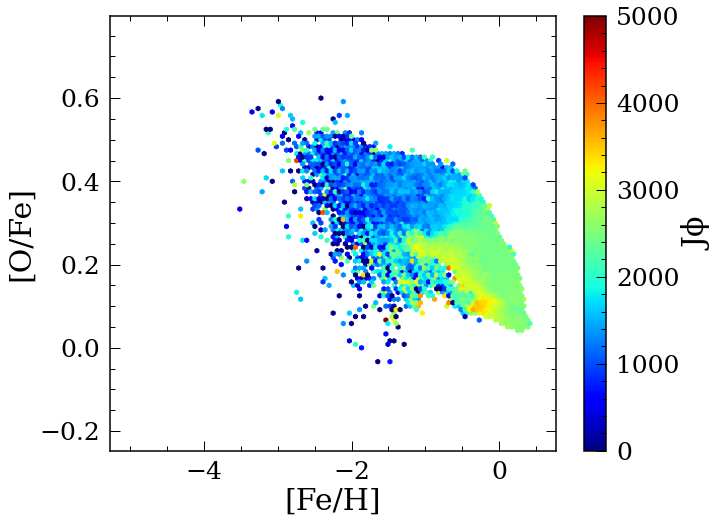

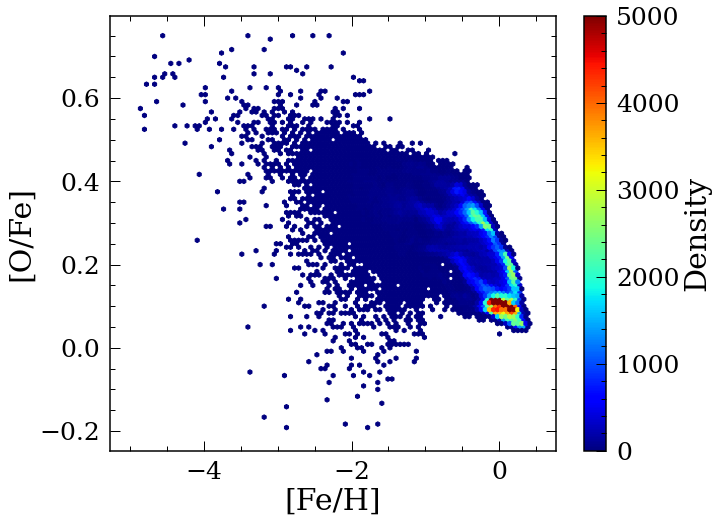

In [328]:
plt.figure(figsize=(10,8))
plt.hexbin(df['R'], df['z'],gridsize=100, extent=(6,12,-5,5), mincnt=1,cmap='jet')
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('R')
plt.ylabel('z')

plt.figure(figsize=(10,8))
plt.hexbin(df['feh'], df['ofe'], C=df['age'], gridsize=100, extent=(-5,0.5,-0.2,0.75),
           mincnt=1,cmap='jet',vmin=0,vmax=14)
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(df['feh'], df['ofe'], C=df['Jz'], gridsize=100, extent=(-5,0.5,-0.2,0.75),
           mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(df['feh'], df['ofe'],gridsize=100, extent=(-5,0.5,-0.2,0.75),
           mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')

Text(0, 0.5, '[Fe/H]')

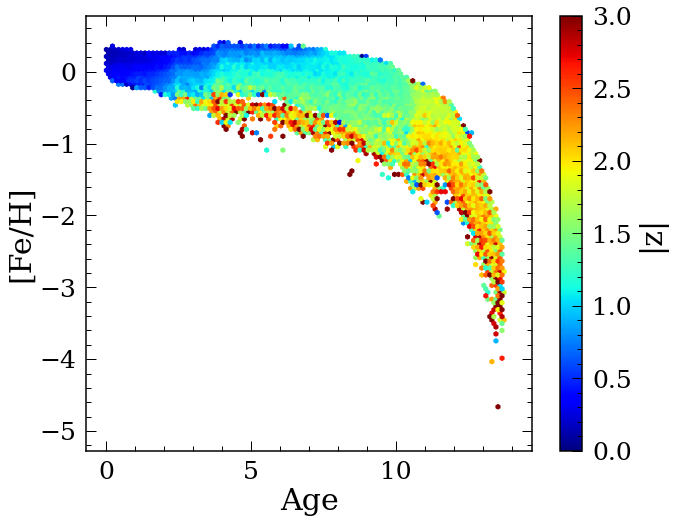

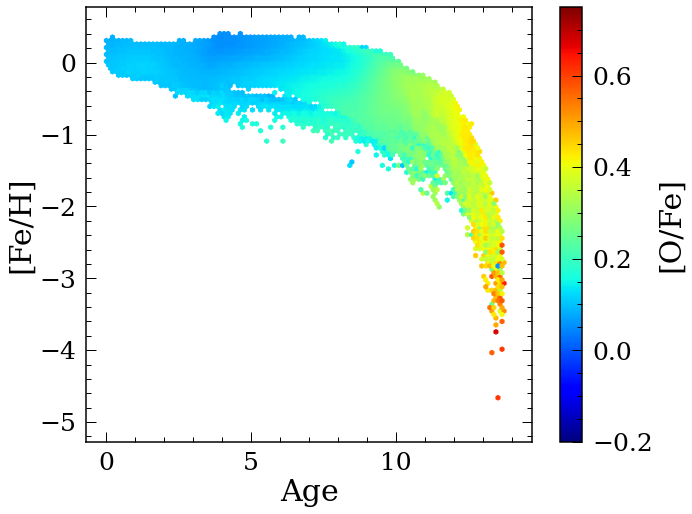

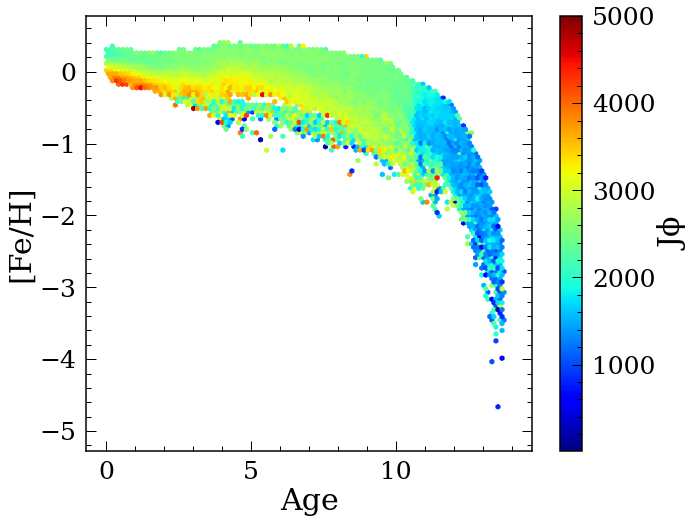

In [405]:

plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=abs(df['z']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=3)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=(df['ofe']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=-0.2,vmax=0.75)
cb = plt.colorbar()
cb.set_label('[O/Fe]')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')




plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['feh'], C=abs(df['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=10,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')



Text(0, 0.5, '[O/Fe]')

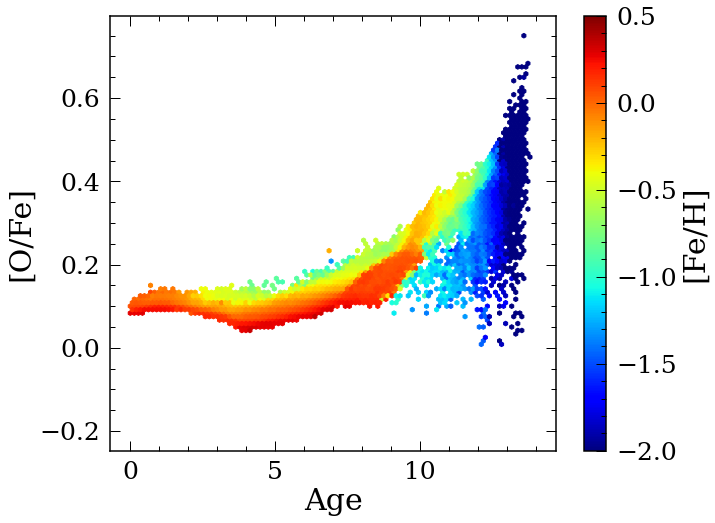

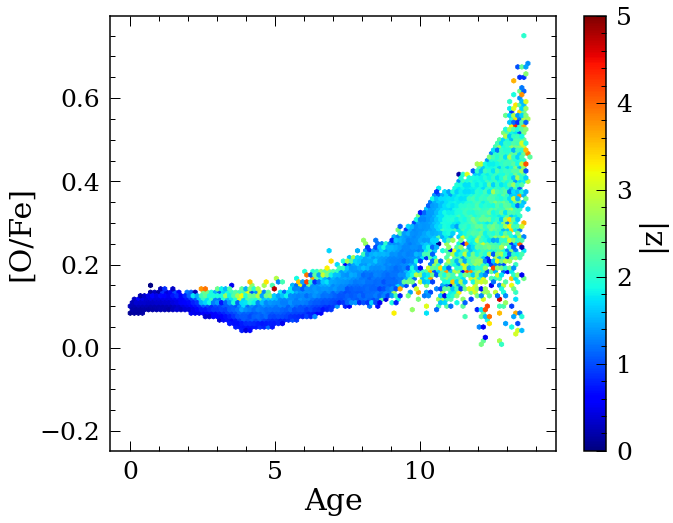

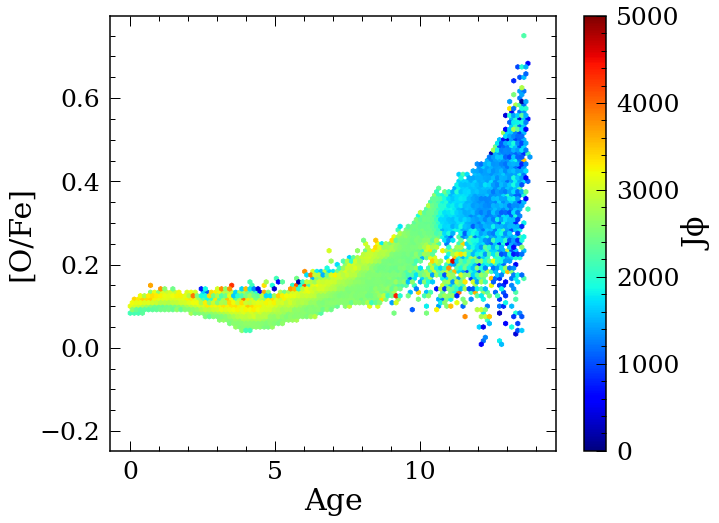

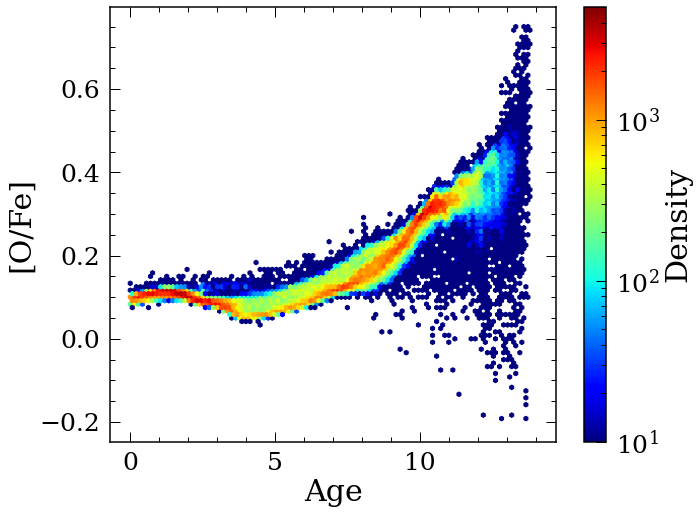

In [342]:

plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=df['feh'],extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=-2,vmax=0.5)
cb = plt.colorbar()
cb.set_label('[Fe/H]')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=abs(df['z']),extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], C=abs(df['Jz']),extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



plt.figure(figsize=(10,8))
plt.hexbin(df['age'], df['ofe'], extent=(0,14,-0.2,0.75), 
           gridsize=100, mincnt=1,cmap='jet',vmin=10,vmax=5000,bins='log')
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


# cut with [Fe/H] and age

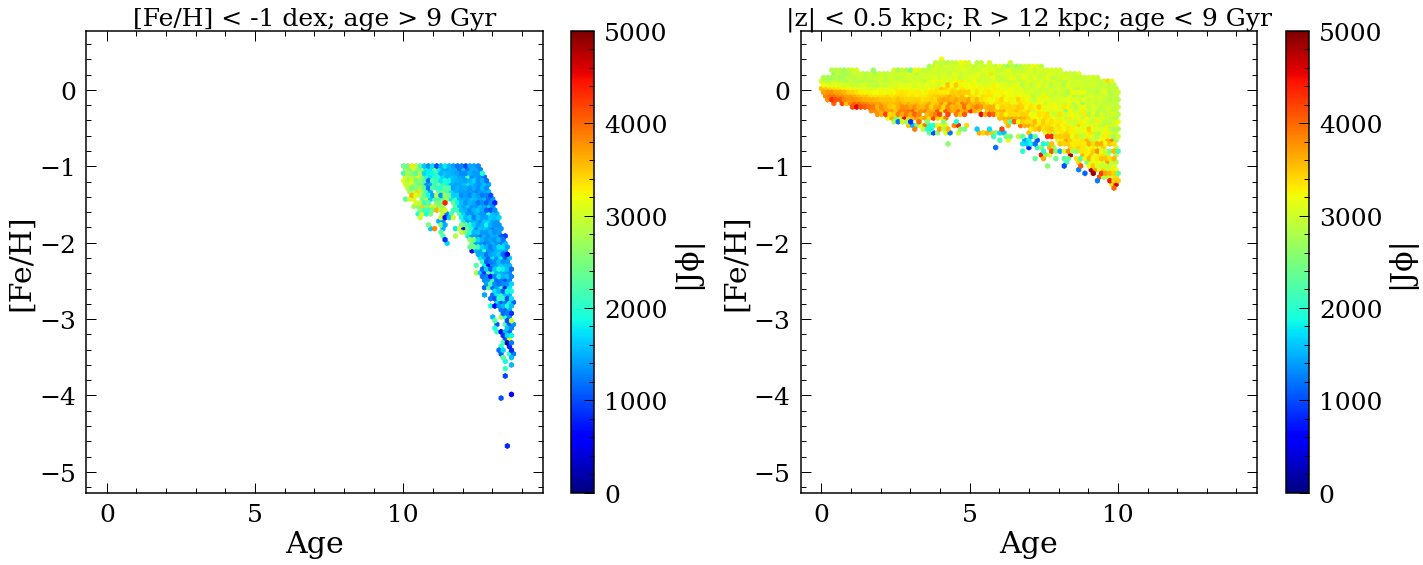

In [425]:
agecut = 10
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df_halo = df.loc[df['feh']<-1].reset_index(drop=True)
df_halo = df_halo.loc[df_halo['age']>agecut].reset_index(drop=True)
plt.hexbin(df_halo['age'], df_halo['feh'], C=abs(df_halo['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('[Fe/H] < -1 dex; age > 9 Gyr',fontsize=25)


df_thindisk = df.loc[df['R']>10].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['age']<agecut].reset_index(drop=True)
plt.subplot(1,2,2)
plt.hexbin(df_thindisk['age'], df_thindisk['feh'], 
           C=abs(df_thindisk['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('|z| < 0.5 kpc; R > 12 kpc; age < 9 Gyr',fontsize=25)
plt.tight_layout()


Text(0, 0.5, '[O/Fe]')

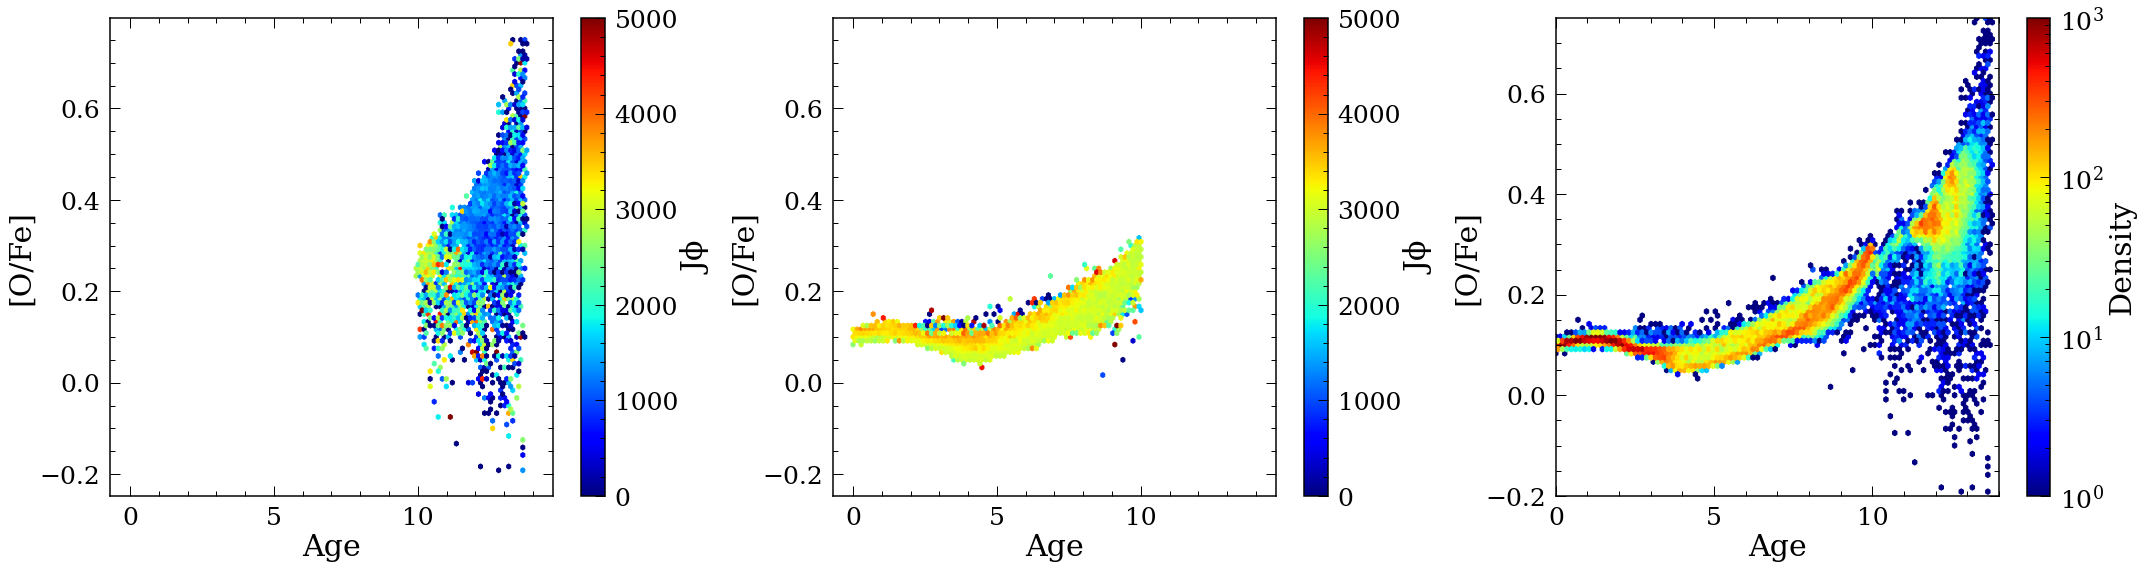

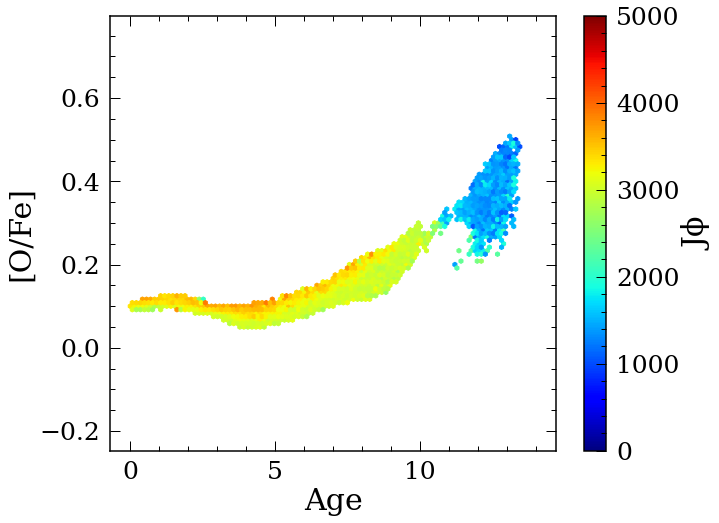

In [426]:


plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['Jz'], extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,2)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=df_thindisk['Jz'], 
           extent=(0,14,-0.2,0.75),cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,3)
plt.hexbin(df_halo['age'], df_halo['ofe'], extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'],  extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.xlim([0,14])
plt.ylim([-0.2,0.75])

plt.tight_layout()


plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['Jz']), extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


Text(0, 0.5, '[O/Fe]')

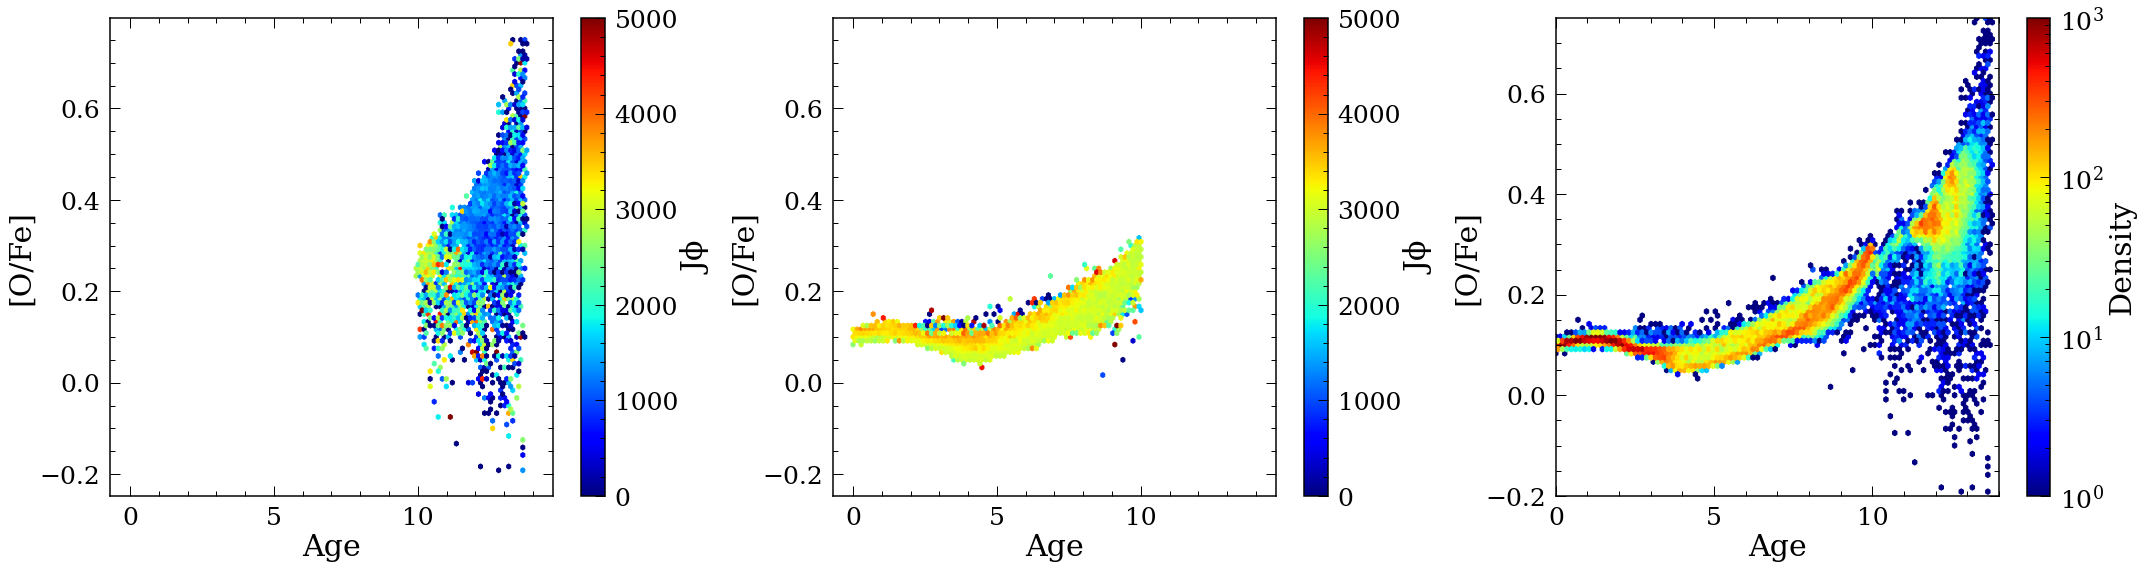

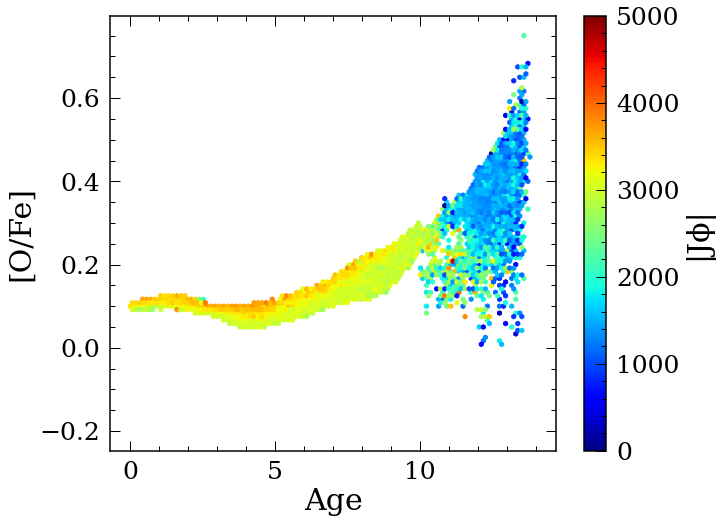

In [427]:


plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['Jz'], extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,2)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=df_thindisk['Jz'], 
           extent=(0,14,-0.2,0.75),cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,3)
plt.hexbin(df_halo['age'], df_halo['ofe'], extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'],  extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.xlim([0,14])
plt.ylim([-0.2,0.75])

plt.tight_layout()


plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['Jz']), extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=1)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000, mincnt=10)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



100%|██████████| 49/49 [00:00<00:00, 125.29it/s]


Text(0.5, 1.0, 'Column Normalized Density, all stars in low-α')

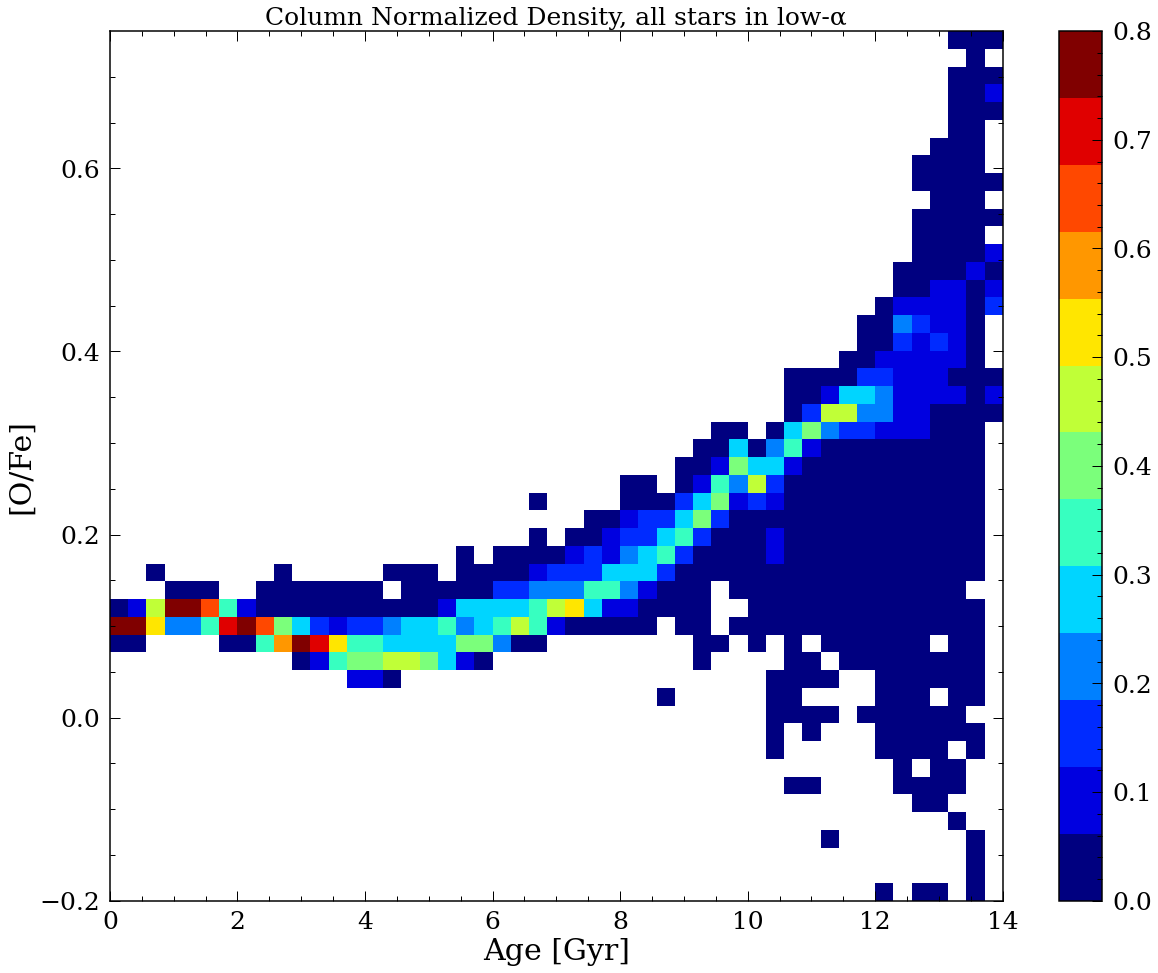

In [428]:
alldenplot = pd.concat([df_halo, df_thindisk])
alldenplot = alldenplot.reset_index(drop=True)
H, yedges, xedges = np.histogram2d(alldenplot['age'], alldenplot['ofe'], 
                                   bins=(np.linspace(0,14,50),
                                    np.linspace(-0.2,0.75,50)))
for i in trange(len(yedges)-1):
    m = (alldenplot['age']>yedges[i])&(alldenplot['age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan

cmap1 = plt.cm.get_cmap('jet',13)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.8)
cb = plt.colorbar()

plt.xlabel('Age [Gyr]')
plt.ylabel('[O/Fe]')
plt.title('Column Normalized Density, all stars in low-α', fontsize=25)

# Cut by J$\phi$

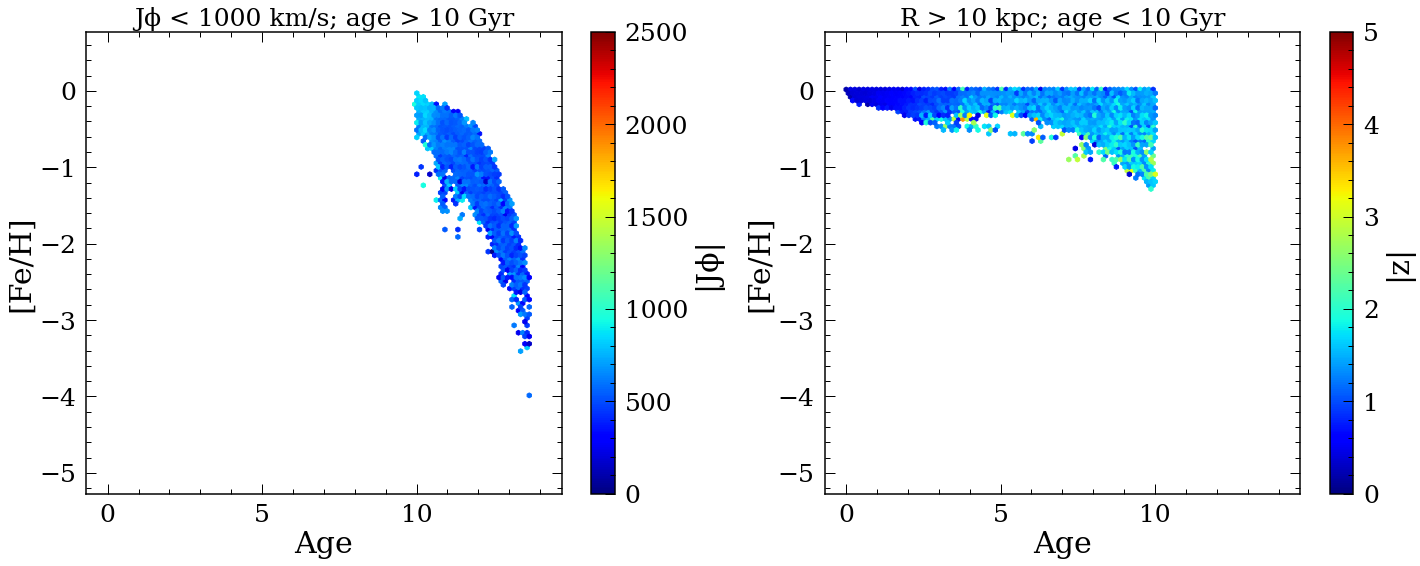

In [458]:
agecut = 10
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df_halo = df.loc[abs(df['Jz'])<1000].reset_index(drop=True)
df_halo = df_halo.loc[df_halo['age']>agecut].reset_index(drop=True)
#df_halo = df_halo.loc[df_halo['feh']>-1.5].reset_index(drop=True)
plt.hexbin(df_halo['age'], df_halo['feh'], C=abs(df_halo['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=2500)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('Jϕ < 1000 km/s; age > 10 Gyr',fontsize=25)


df_thindisk = df.loc[abs(df['Jz'])>2000].reset_index(drop=True)
#df_thindisk = df_thindisk.loc[abs(df_thindisk['z'])<0.5].reset_index(drop=True)
df_thindisk = df_thindisk.loc[(df_thindisk['R'])>10].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['age']<agecut].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['feh']<0].reset_index(drop=True)
plt.subplot(1,2,2)
plt.hexbin(df_thindisk['age'], df_thindisk['feh'], 
           C=abs(df_thindisk['z']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('R > 10 kpc; age < 10 Gyr',fontsize=25)
plt.tight_layout()



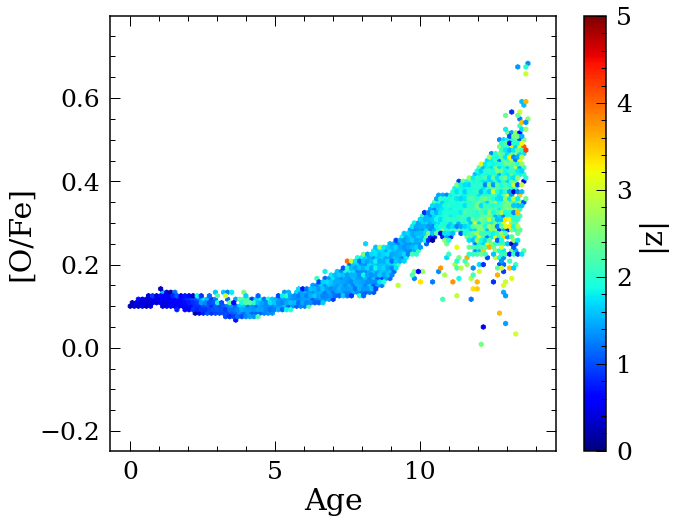

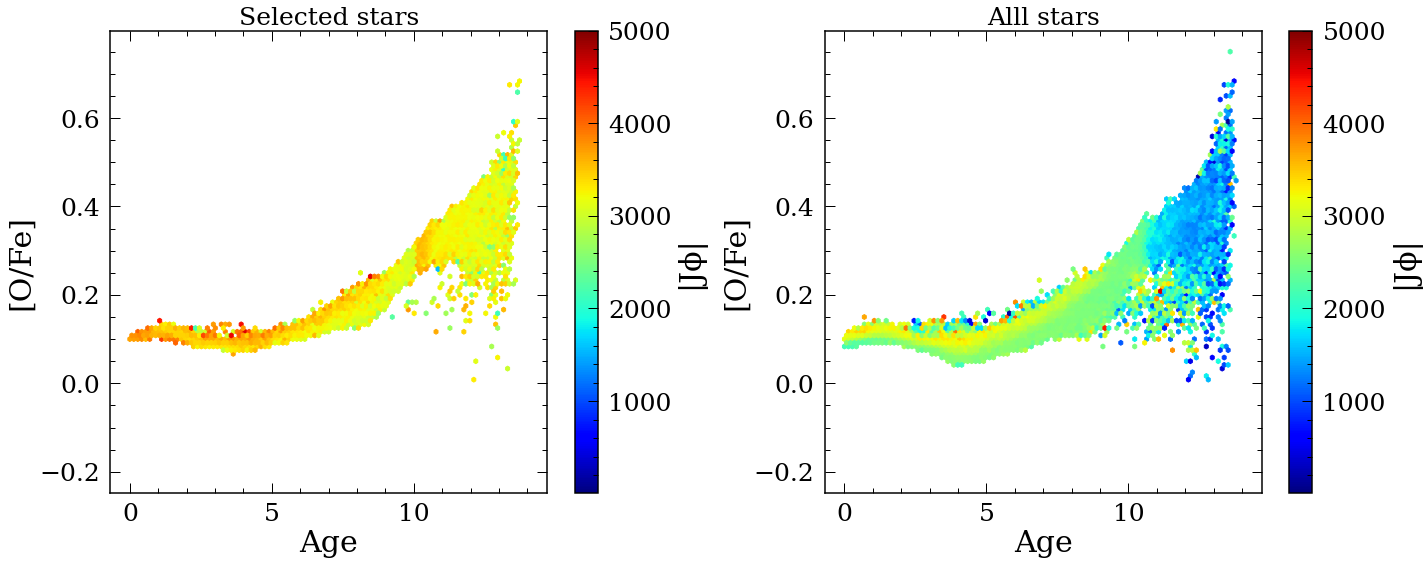

In [459]:

"""
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['Jz'], extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,2)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=df_thindisk['Jz'], 
           extent=(0,14,-0.2,0.75),cmap='jet',vmin=0,vmax=5000)
cb = plt.colorbar()
cb.set_label('Jϕ')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


plt.subplot(1,3,3)
plt.hexbin(df_halo['age'], df_halo['ofe'], extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'],  extent=(0,14,-0.2,0.75),
           cmap='jet',mincnt=1,bins='log',vmin=1,vmax=1000)
cb = plt.colorbar()
cb.set_label('Density')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.xlim([0,14])
plt.ylim([-0.2,0.75])

plt.tight_layout()"""


plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['z']), extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5, mincnt=1)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], C=abs(df_thindisk['z']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=0,vmax=5, mincnt=1)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hexbin(df_halo['age'], df_halo['ofe'], C=abs(df_halo['Jz']), 
           extent=(0,14,-0.2,0.75),bins='log',
          cmap='jet',vmin=10,vmax=5000, mincnt=1)
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], 
           C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=10,vmax=5000, mincnt=1)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.title('Selected stars', fontsize=25)

plt.subplot(1,2,2)
plt.hexbin(df['age'], df['ofe'], C=abs(df['Jz']), 
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=10,vmax=5000, mincnt=1)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')
plt.title('Alll stars', fontsize=25)
plt.tight_layout()

Text(0, 0.5, '[O/Fe]')

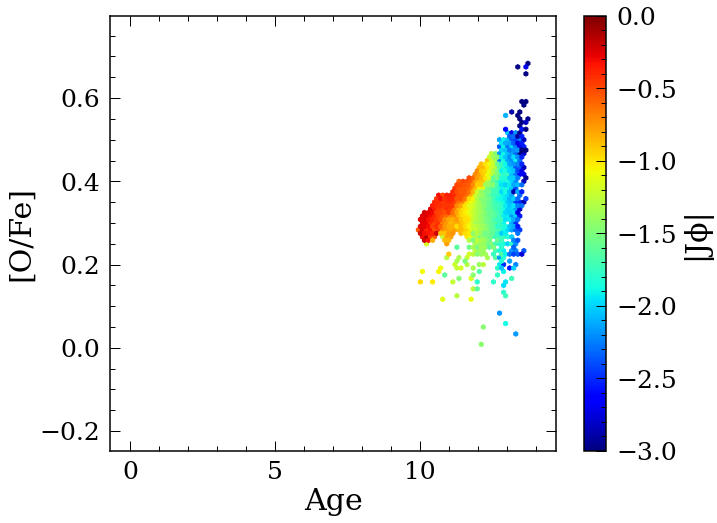

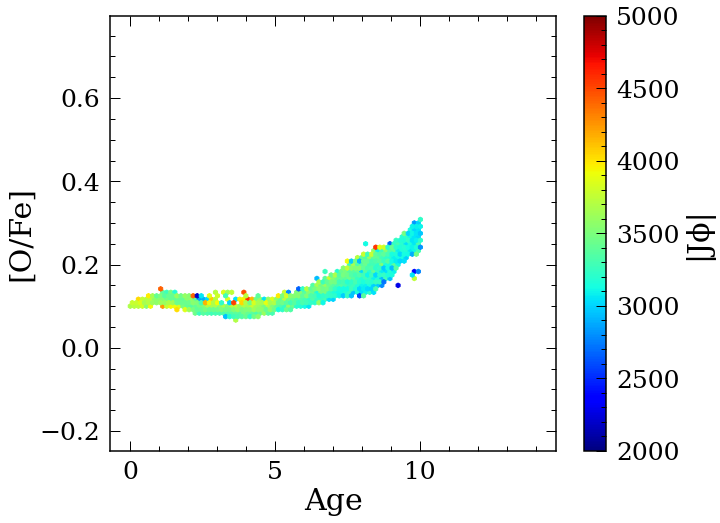

In [460]:



plt.figure(figsize=(10,8))
plt.hexbin(df_halo['age'], df_halo['ofe'], C=df_halo['feh'], 
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=-3,vmax=0, mincnt=1)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')

plt.figure(figsize=(10,8))
plt.hexbin(df_thindisk['age'], df_thindisk['ofe'], 
           C=abs(df_thindisk['Jz']),
           extent=(0,14,-0.2,0.75),
          cmap='jet',vmin=2000,vmax=5000, mincnt=1)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[O/Fe]')


100%|██████████| 49/49 [00:00<00:00, 193.87it/s]


Text(0.5, 1.0, 'Column Normalized Density, only select high Jϕ stars')

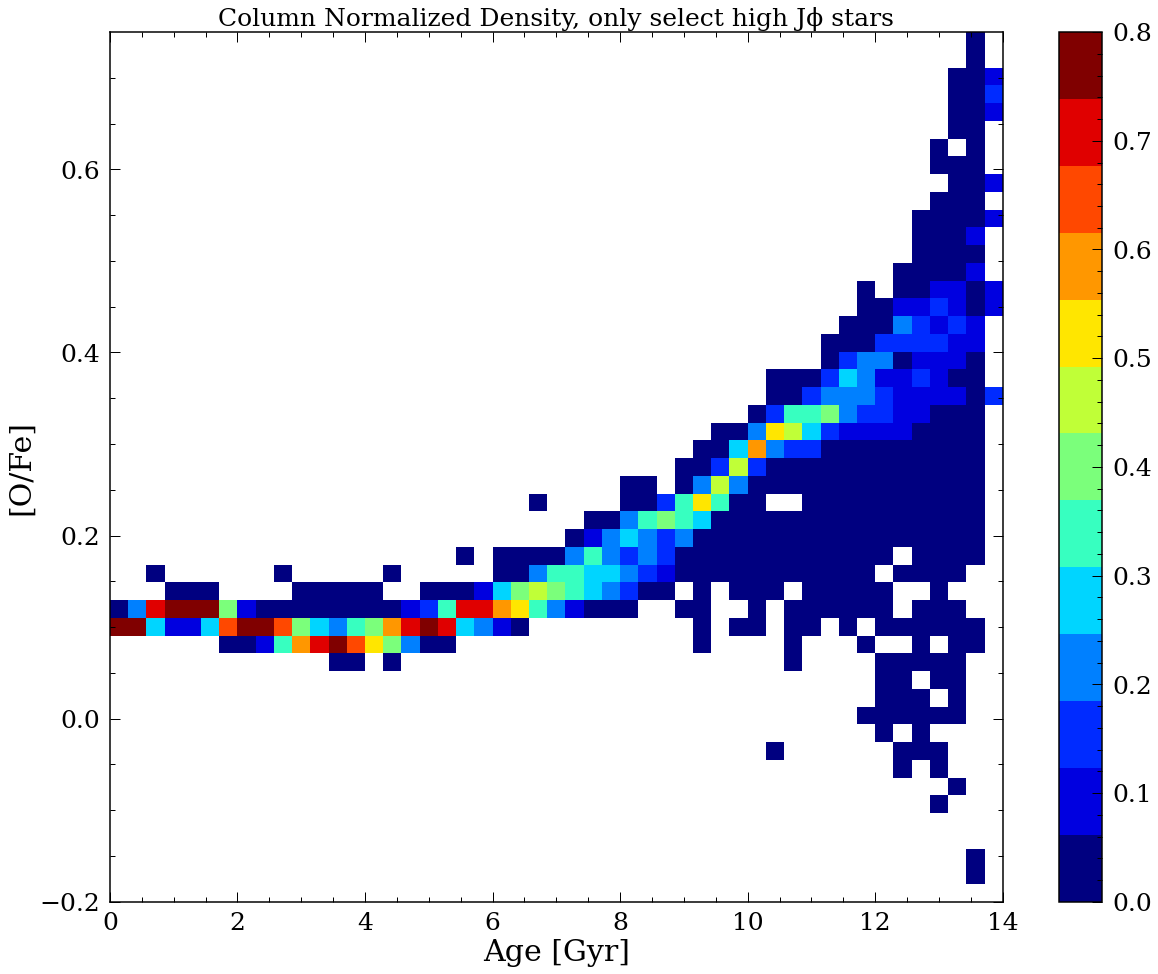

In [461]:
alldenplot = pd.concat([df_halo, df_thindisk])
alldenplot = alldenplot.reset_index(drop=True)
H, yedges, xedges = np.histogram2d(alldenplot['age'], alldenplot['ofe'], 
                                   bins=(np.linspace(0,14,50),
                                    np.linspace(-0.2,0.75,50)))
for i in trange(len(yedges)-1):
    m = (alldenplot['age']>yedges[i])&(alldenplot['age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan

cmap1 = plt.cm.get_cmap('jet',13)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.8)
cb = plt.colorbar()

plt.xlabel('Age [Gyr]')
plt.ylabel('[O/Fe]')
plt.title('Column Normalized Density, only select high Jϕ stars', fontsize=25)

# Metallicity cut

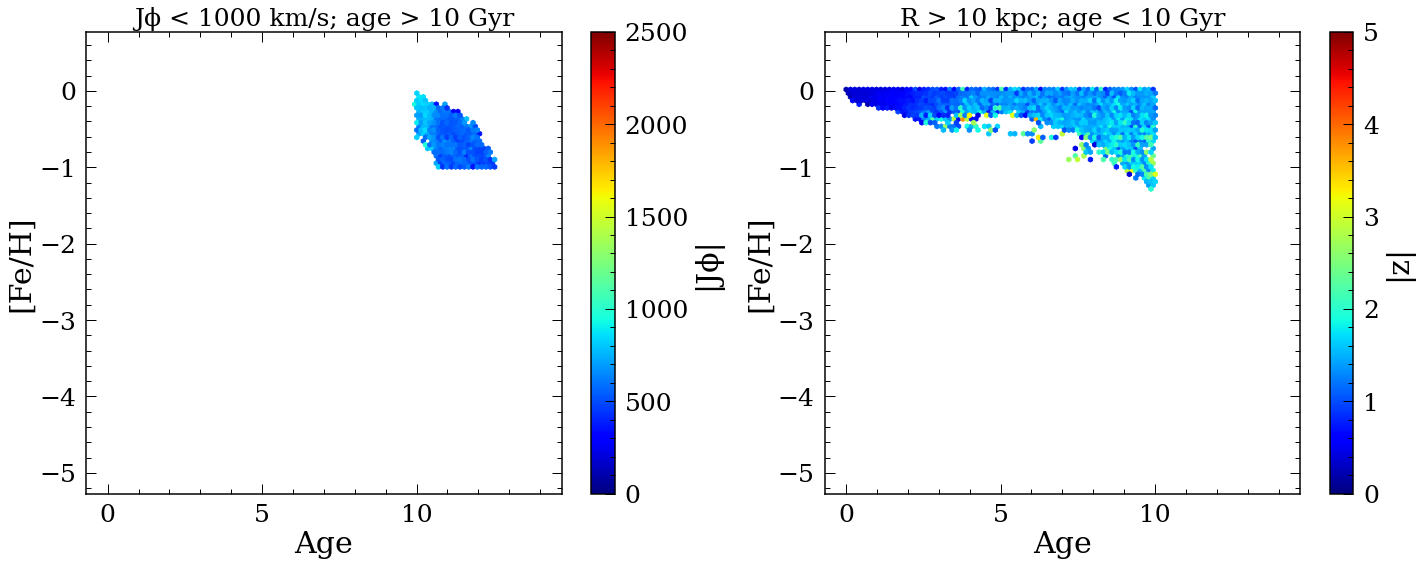

In [464]:
agecut = 10
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df_halo = df.loc[abs(df['Jz'])<1000].reset_index(drop=True)
df_halo = df_halo.loc[df_halo['age']>agecut].reset_index(drop=True)
df_halo = df_halo.loc[df_halo['feh']>-1].reset_index(drop=True)
plt.hexbin(df_halo['age'], df_halo['feh'], C=abs(df_halo['Jz']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=2500)
cb = plt.colorbar()
cb.set_label('|Jϕ|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('Jϕ < 1000 km/s; age > 10 Gyr',fontsize=25)


df_thindisk = df.loc[abs(df['Jz'])>2000].reset_index(drop=True)
#df_thindisk = df_thindisk.loc[abs(df_thindisk['z'])<0.5].reset_index(drop=True)
df_thindisk = df_thindisk.loc[(df_thindisk['R'])>10].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['age']<agecut].reset_index(drop=True)
df_thindisk = df_thindisk.loc[df_thindisk['feh']<0].reset_index(drop=True)
plt.subplot(1,2,2)
plt.hexbin(df_thindisk['age'], df_thindisk['feh'], 
           C=abs(df_thindisk['z']),extent=(0,14,-5,0.5), 
           gridsize=100, mincnt=1,cmap='jet',vmin=0,vmax=5)
cb = plt.colorbar()
cb.set_label('|z|')
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
plt.title('R > 10 kpc; age < 10 Gyr',fontsize=25)
plt.tight_layout()




 43%|████▎     | 21/49 [00:00<00:00, 208.81it/s]<ipython-input-466-4e9929e5bc5d>:8: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
100%|██████████| 49/49 [00:00<00:00, 223.36it/s]


Text(0.5, 1.0, 'Column Normalized Density, only select high Jϕ stars with [Fe/H]>-1')

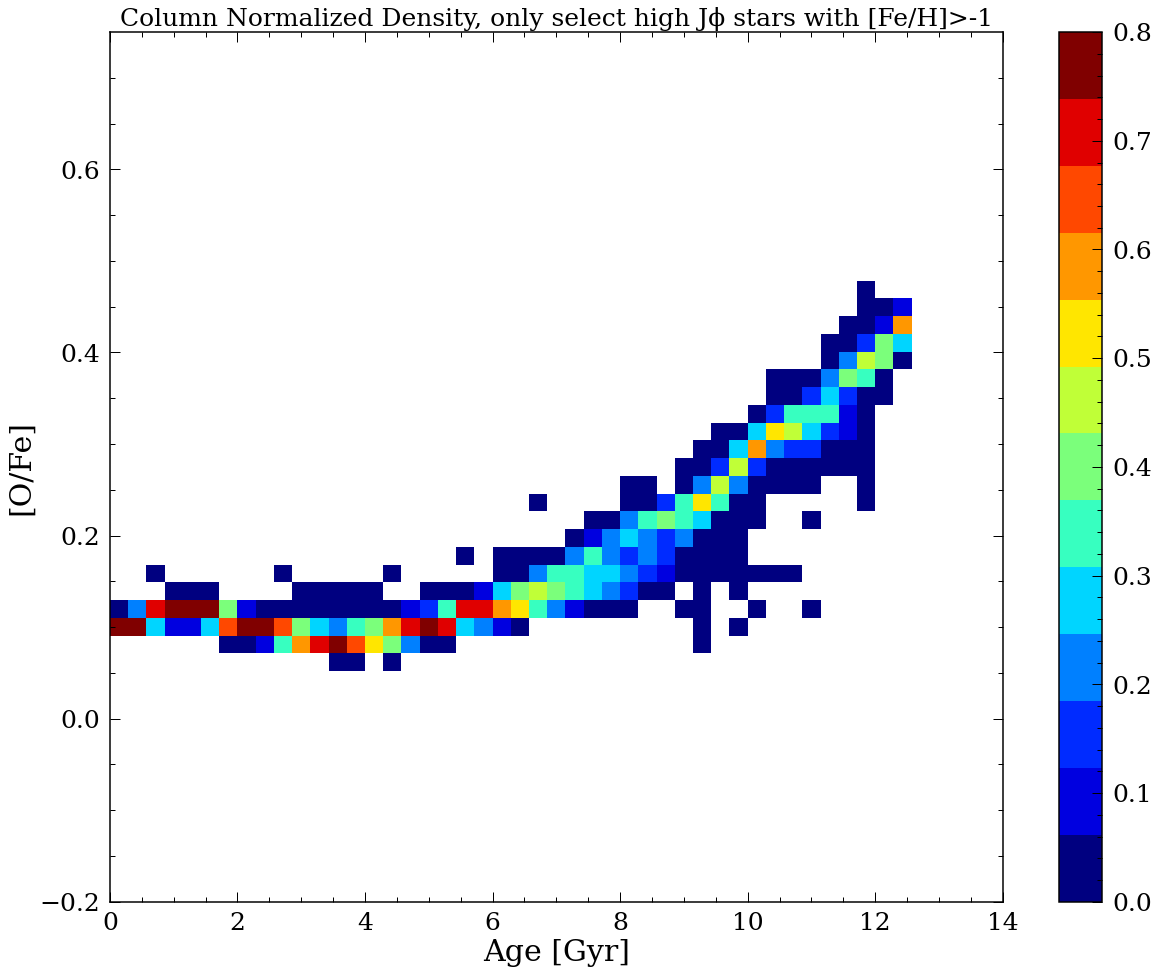

In [466]:
alldenplot = pd.concat([df_halo, df_thindisk])
alldenplot = alldenplot.reset_index(drop=True)
H, yedges, xedges = np.histogram2d(alldenplot['age'], alldenplot['ofe'], 
                                   bins=(np.linspace(0,14,50),
                                    np.linspace(-0.2,0.75,50)))
for i in trange(len(yedges)-1):
    m = (alldenplot['age']>yedges[i])&(alldenplot['age']<yedges[i+1])
    H[i,:] = H[i,:]/sum(m)
    
for i in range(len(H[0,:])):
    for j in range(len(H[:,0])):
        if H[j,i] == 0:
            H[j,i] = np.nan

cmap1 = plt.cm.get_cmap('jet',13)
cmap1.set_bad('white',1.)

plt.figure(figsize=(20,16))
plt.pcolormesh(yedges, xedges, H.T, cmap=cmap1, vmin=0, vmax=0.8)
cb = plt.colorbar()

plt.xlabel('Age [Gyr]')
plt.ylabel('[O/Fe]')
plt.title('Column Normalized Density, only select high Jϕ stars with [Fe/H]>-1', fontsize=25)